### Ames Housing Price Data
<br></br>
<br></br>
Mike Thisyamondol

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

In [2]:
# Import train/test data

df_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
# df_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

#### Check Data

In [3]:
# Check shape of data
df_train.shape

(1460, 81)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

#### Investigate Null Values

At first glance, it seems as though there is a significant amount of null values for certain features, but after close inspection of the data_description.txt file, a lot of the null values correspond to the houses not having the feature such as a pool, alley, fence, etc. Because of this, we can potentially replace null values with 'NA' after a bit of validation.

Columns where null = NA/0:

- PoolQC
- MiscFeature
- Alley
- Fence
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- BsmtFinType2
- BsmtExposure
- BsmtFinType1
- BsmtCond
- BsmtQual


Some null values might not be worth the effort especially if it will not be a strong predictor in price. Let's first address the features that we're more confident we can replace null with NA such as PoolQC, MiscFeature, Alley, Fence, and FireplaceQu.

In [7]:
# Pool Check
df_train[['PoolQC', 'PoolArea']][df_train[['PoolQC', 'PoolArea']]['PoolQC'].isnull()]['PoolArea'].sum()

0

In [8]:
# Replace PoolQC null values with 'NA'
df_train['PoolQC'] = df_train['PoolQC'].fillna("NA")

In [9]:
# MiscFeatures Check
df_train[['MiscFeature', 'MiscVal']][df_train[['MiscFeature', 'MiscVal']]['MiscFeature'].isnull()]['MiscVal'].sum()

0

In [10]:
# Replace MiscFeatures null values with 'NA'
df_train['MiscFeature'] = df_train['MiscFeature'].fillna("NA")

In [11]:
# Alley
# Replace Alley null values with 'NA'
df_train['Alley'] = df_train['Alley'].fillna("NA")

In [12]:
# Fence
# Replace Fence null values with 'NA'
df_train['Fence'] = df_train['Fence'].fillna("NA")

In [13]:
# FireplaceQu
# Replace Fence null values with 'NA'
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna("NA")

In [14]:
# Garage variables
garage_columns = [col for col in df_train if "Garage" in col]
garage_columns

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [15]:
df_train[garage_columns][df_train[garage_columns]['GarageType'].isnull()].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN


In [16]:
df_train[garage_columns][df_train[garage_columns]['GarageType'].isnull()]['GarageArea'].sum()

0

In [17]:
# Fill Categorical data with NA, fill numericals with 0
garage_col_cat = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
garage_col_num = ['GarageCars', 'GarageArea', 'GarageYrBlt']

In [18]:
for col in garage_col_cat:
    df_train[col] = df_train[col].fillna("NA")
    

In [19]:
for col in garage_col_num:
    df_train[col] = df_train[col].fillna(0)

In [20]:
# Basement Variables
bsmt_columns = [col for col in df_train if "Bsmt" in col]
bsmt_columns

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [21]:
df_train[bsmt_columns][df_train[bsmt_columns]['BsmtCond'].isnull()]['TotalBsmtSF'].sum()

0

In [22]:
# Fill Categorical data with NA, fill numericals with 0
bsmt_col_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',]
bsmt_col_num = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']

In [23]:
for col in bsmt_col_cat:
    df_train[col] = df_train[col].fillna("NA")

In [24]:
for col in bsmt_col_num:
    df_train[col] = df_train[col].fillna(0)

In [25]:
# Lot Frontage
lot_columns = [col for col in df_train if "Lot" in col]
df_train[lot_columns].head()

,LotFrontage,LotArea,LotShape,LotConfig
0,65.0,8450,Reg,Inside
1,80.0,9600,Reg,FR2
2,68.0,11250,IR1,Inside
3,60.0,9550,IR1,Corner
4,84.0,14260,IR1,FR2


It would seem to make sense that the Lot Frontage which is the "Linear feet of street connected to property" would depend heavily on LotConfig, therefore it would make sense to impute the null values for Lot Frontage with the average of lot frontage by lot config.

In [26]:
df_train['LotFrontage'] = df_train[['LotFrontage']].fillna(df_train.groupby('LotConfig').transform('mean'))

In [27]:
#MasVnrArea + MasVnrType
df_train[df_train['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


Since all values where MasVnrType is null, MasVnrArea is null as well, we can probably conclude that this means that the house does not have Masonry Veneer.

In [28]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna("None")
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

In [29]:
# Electrical

df_train[df_train['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2008,WD,Normal,167500


Because it might not be worth the effort to fill in the Electrical information given only 1 row is null, we will go ahead a drop this row.

In [30]:
drop = df_train[df_train['Electrical'].isnull()].index
df_train = df_train.drop(drop)

In [31]:
# Check Nulls:

df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

#### Data Exploration/Feature Engineering

In [32]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,70.024829,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,22.317523,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,67.715686,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle

Based off personal experience, there are a number of factors that help determine housing price. The most important factors that come to mind are: Location (neighborhood), building type, square footage/lot area, quality/condition, and additional features such as pools, decks, etc. 

Since this dataset contains these factors broken out into smaller sub features, we can potentially combine a few together to create new features such as total square footage. We can also transform the quality features into ordinal variables, potentially making it easier to perform a regression, instead of creating dummy variables for them.

In [34]:
# Combine SF features to create Total SF
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
# Combine Bathroom features to create Total Baths
df_train['TotalBaths'] = df_train['FullBath'] + df_train['BsmtFullBath'] + 0.5*(df_train['HalfBath'] + df_train['BsmtHalfBath'])

In [35]:
# Rating Dictionary
rating_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

# Find all columns that use rating system: Ex, Gd, TA, Fa, Po
rating_columns = [col for col in df_train.columns if df_train[col].sort_values().iloc[0] == 'Ex']

# # Map values using dictionary
for col in rating_columns:
    df_train[col] = df_train[col].map(rating_dict)

Let's take a quick look at our features to see if any contain outliers with a quick visual check.

Text(0.5,1,'All variables boxplot\n')

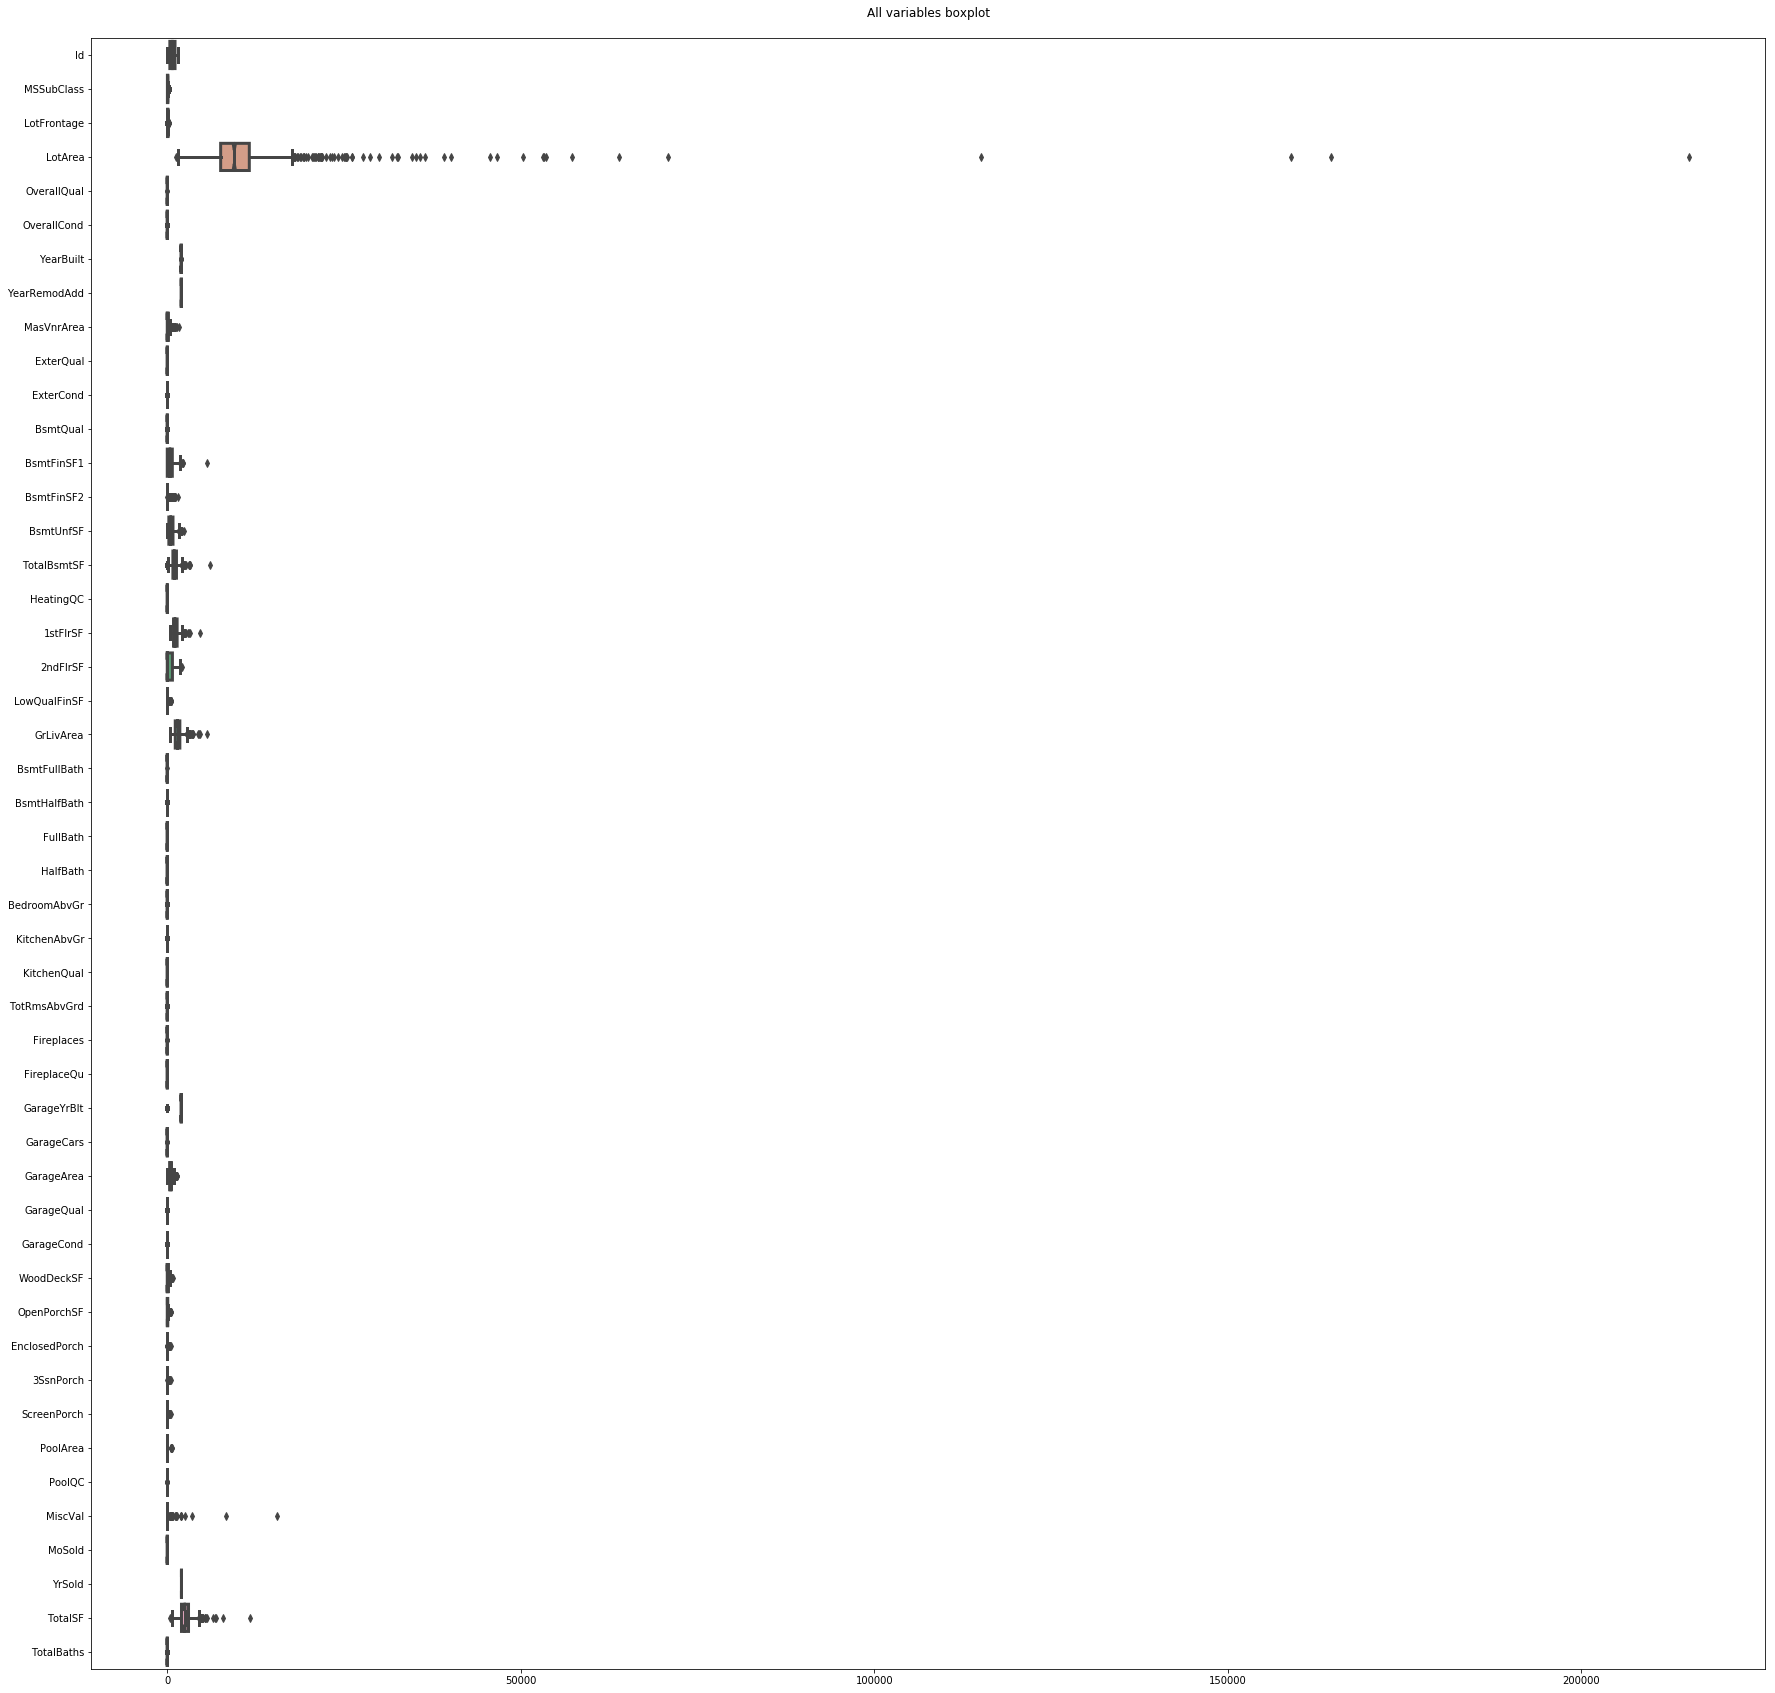

In [36]:
# Quick visual check for outliers:

fig = plt.figure(figsize=(30,30))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns != 'SalePrice'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')

Based off the above boxplots, it seems as though there a number of features that have some outliers. Lets take a closer look at them below:

Text(0.5,1,'Sale Price boxplot\n')

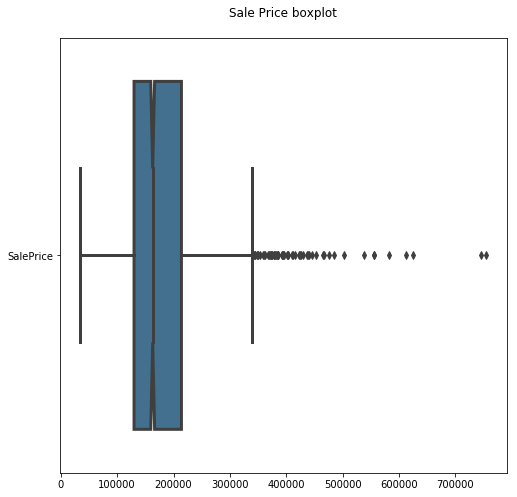

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns == 'SalePrice'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('Sale Price boxplot\n')

Text(0.5,1,'Lot Area boxplot\n')

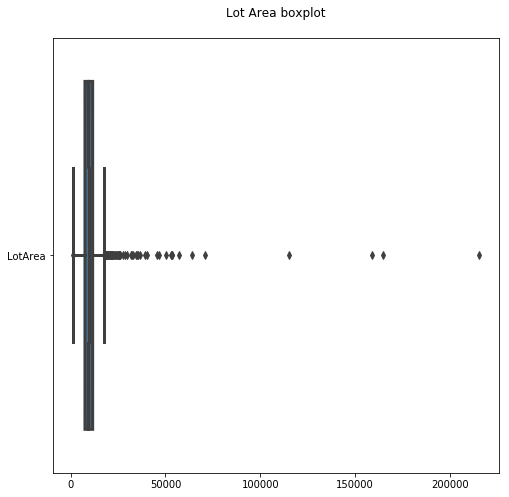

In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns == 'LotArea'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('Lot Area boxplot\n')

Text(0.5,1,'BsmtFinSF1 boxplot\n')

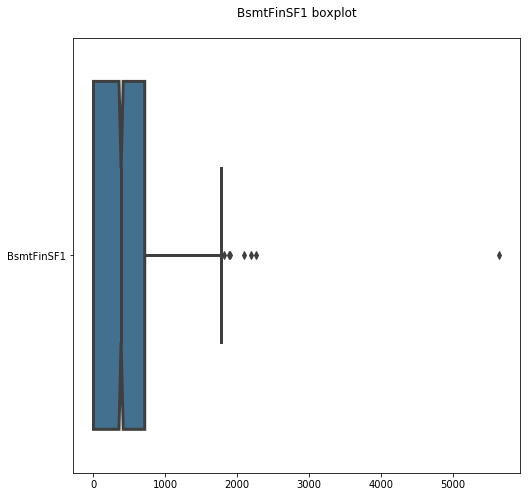

In [39]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns == 'BsmtFinSF1'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('BsmtFinSF1 boxplot\n')

Text(0.5,1,'TotalBsmtSF boxplot\n')

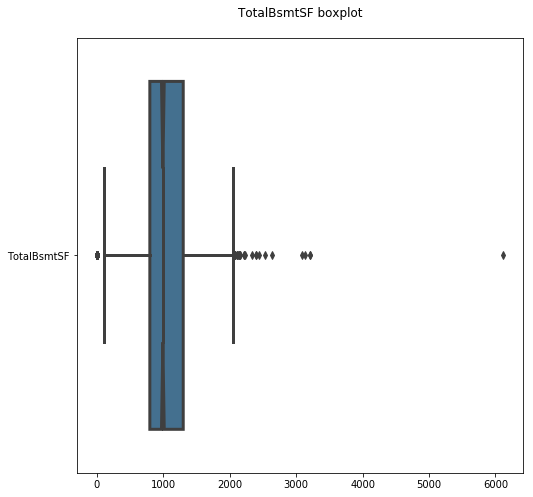

In [40]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns == 'TotalBsmtSF'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('TotalBsmtSF boxplot\n')

Text(0.5,1,'1stFlrSF boxplot\n')

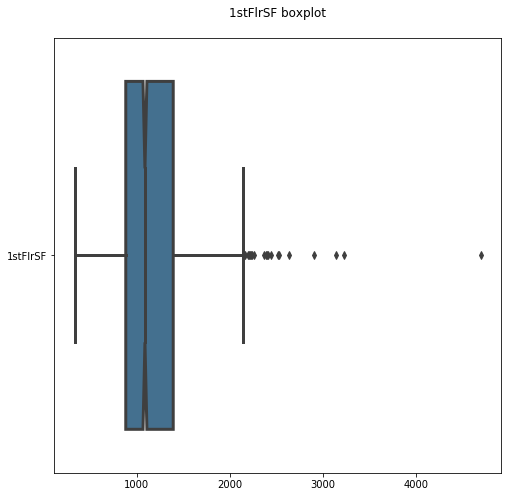

In [41]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns == '1stFlrSF'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('1stFlrSF boxplot\n')

Text(0.5,1,'GrLivArea boxplot\n')

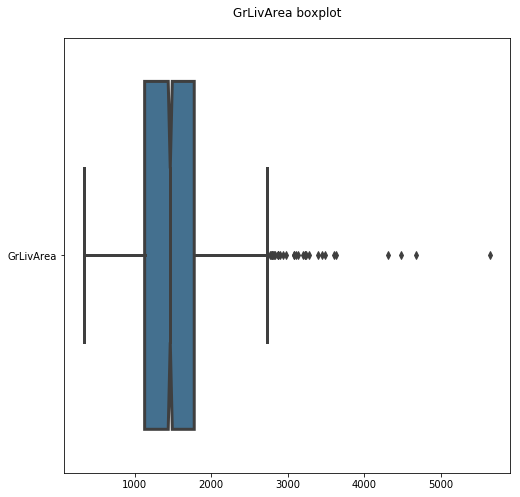

In [42]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns == 'GrLivArea'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('GrLivArea boxplot\n')

Text(0.5,1,'MiscVal boxplot\n')

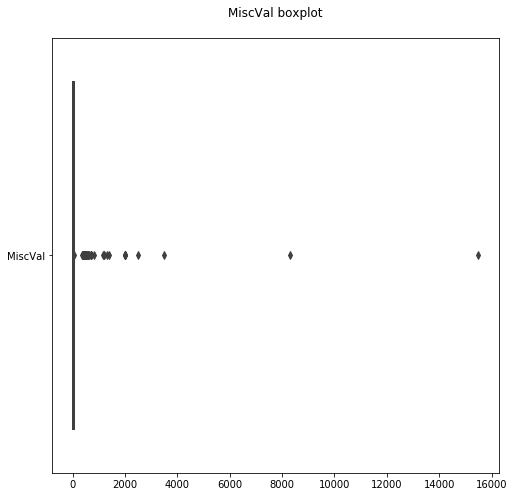

In [43]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns == 'MiscVal'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('MiscVal boxplot\n')

Text(0.5,1,'MasVnrArea boxplot\n')

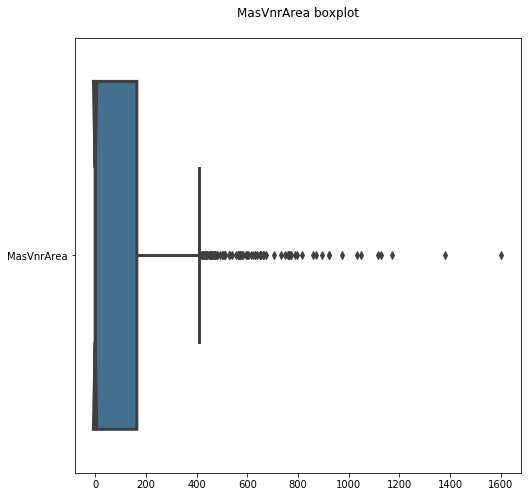

In [44]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

ax = sns.boxplot(data=df_train.loc[:, df_train.columns == 'MasVnrArea'], orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('MasVnrArea boxplot\n')

Becuase it is hard to determine if these outliers are valid on their own, let's plot them out against SalePrice to see if they make sense. It would also make sense to take a look at these broken down by neighborhood to help identify other anomalies, the idea being a sensible value in one neighborhood might not be the case for a different one.

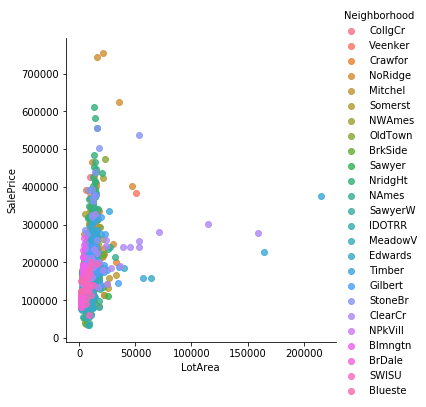

In [45]:
sns.lmplot('LotArea', 'SalePrice', data=df_train, hue='Neighborhood', fit_reg=False)

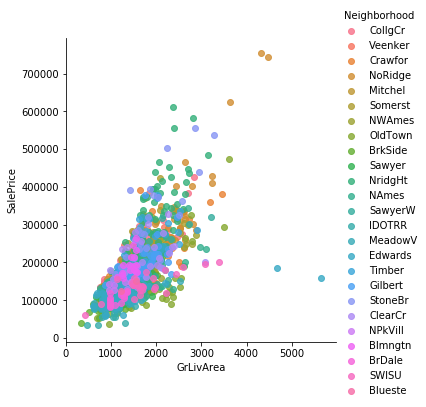

In [46]:
sns.lmplot('GrLivArea', 'SalePrice', data=df_train, hue='Neighborhood', fit_reg=False)

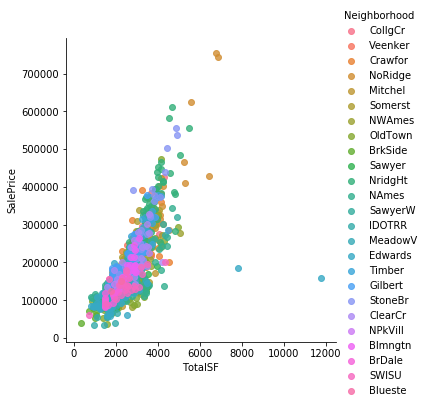

In [47]:
sns.lmplot('TotalSF', 'SalePrice', data=df_train, hue='Neighborhood', fit_reg=False)

Let's see what happens when we remove some of the outliers:

In [48]:
df_train = df_train.drop(df_train[df_train['LotArea'] > 100000].index)
df_train = df_train.drop(df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 200000)].index)

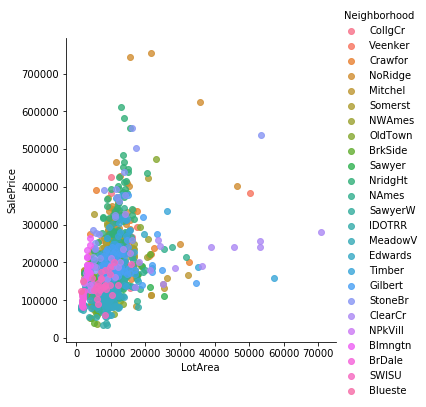

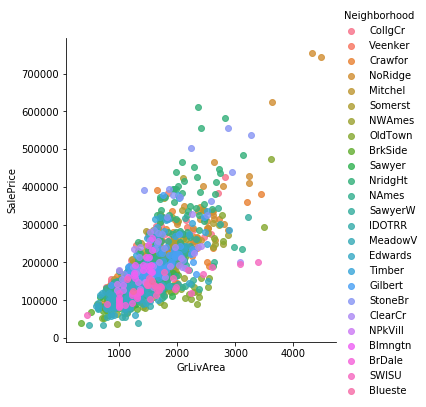

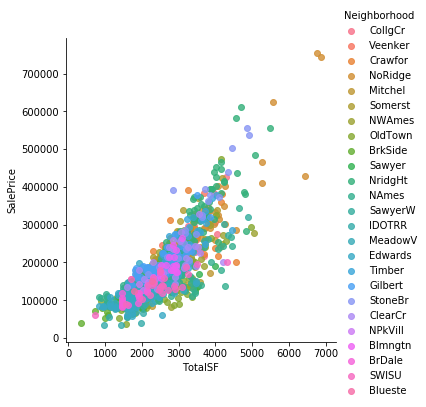

In [49]:
sns.lmplot('LotArea', 'SalePrice', data=df_train, hue='Neighborhood', fit_reg=False)
sns.lmplot('GrLivArea', 'SalePrice', data=df_train, hue='Neighborhood', fit_reg=False)
sns.lmplot('TotalSF', 'SalePrice', data=df_train, hue='Neighborhood', fit_reg=False)

In addition to square footage/lot area, it makes intuitive sense that the overall quality of the home, and the neighborhood would be good predictors of housing price.

Text(0.5,1,'OverallQual by SalePrice boxplot\n')

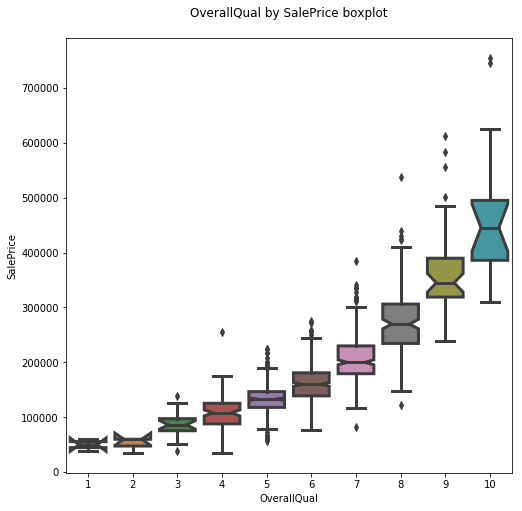

In [50]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax = sns.boxplot(x ='OverallQual', y ='SalePrice', data = df_train, fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('OverallQual by SalePrice boxplot\n')

In [51]:
neigh_order = df_train.groupby('Neighborhood')['SalePrice'].mean().to_frame().sort_values('SalePrice',ascending=True)

Text(0.5,1,'Neighborhood by SalePrice boxplot\n')

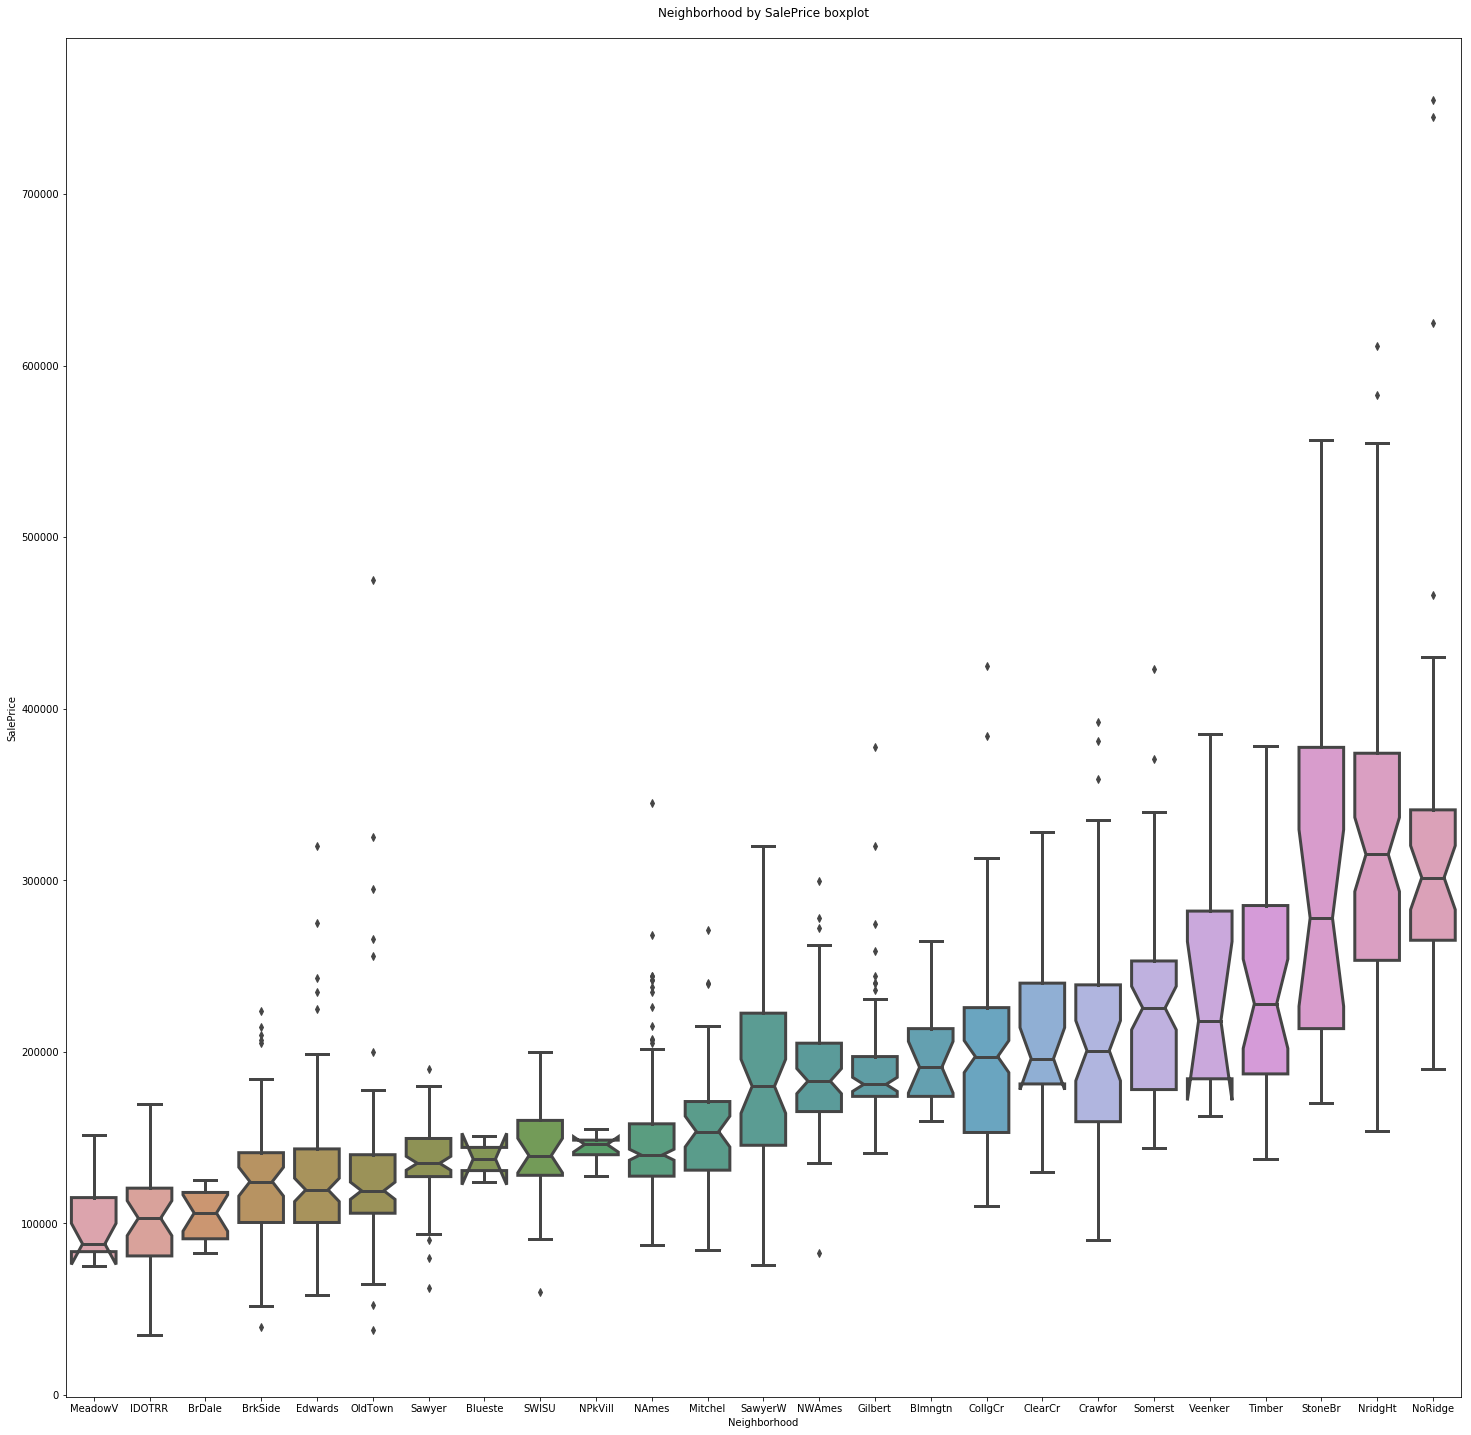

In [52]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
ax = sns.boxplot(x ='Neighborhood', y ='SalePrice', data = df_train, fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax, order=neigh_order.index)
ax.set_title('Neighborhood by SalePrice boxplot\n')

It does seem as though OverallQual is a good potential predictor, but does not seem like Neighborhood is a good one. It intuitively makes sense that the neighborhood/location would affect the price, but there is a decent amount of variance in each, that makes it a poor predictor. Let's see if grouping them into an ordinal groups based off mean price will yield anything...

In [54]:
neighborhood = neigh_order.reset_index()
neighborhood['neighborhoodcat'] = pd.qcut(neighborhood['SalePrice'], q=4, labels=False).to_frame(name='cat')

In [56]:
df_train = df_train.merge(neighborhood[['Neighborhood', 'neighborhoodcat']], on='Neighborhood')

Text(0.5,1,'Neighborhood by SalePrice boxplot\n')

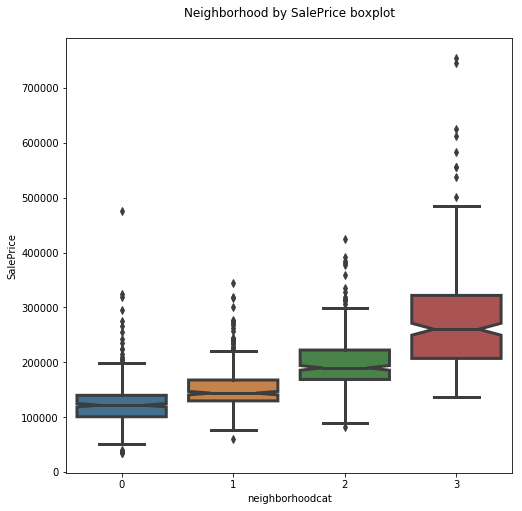

In [57]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax = sns.boxplot(x ='neighborhoodcat', y ='SalePrice', data = df_train, fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('NeighborhoodCat by SalePrice boxplot\n')

After breaking Neighborhoods into the different buckets, it looks like a viable option for a predictor.

#### Potential Predictors

In [58]:
# Combine SF features to create Total SF
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
# Combine Bathroom features to create Total Baths
df_train['TotalBaths'] = df_train['FullBath'] + df_train['BsmtFullBath'] + 0.5*(df_train['HalfBath'] + df_train['BsmtHalfBath'])

In [62]:
# Create consolidated DF
cols_combined = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath', 'Id']
df_train_cons = df_train.drop(cols_combined, axis=1)

Text(0.5,1,'Top Features by Correlation\n')

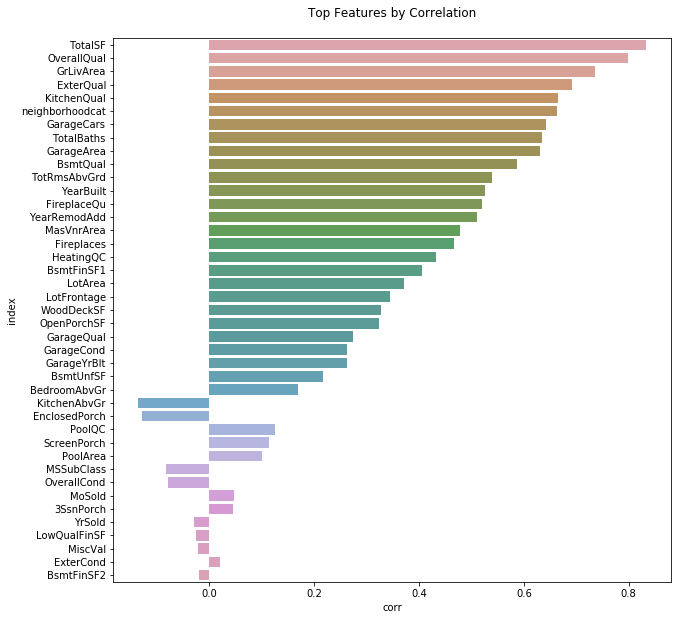

In [63]:
corr = df_train_cons.corr()['SalePrice'].sort_values(ascending=False).to_frame(name='corr').reset_index()
# Accounting for absolute value
corr_abs = corr.reindex(corr['corr'].abs().sort_values(ascending=False).index)
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax = sns.barplot(x='corr', y='index', data=corr_abs.drop(0), saturation=0.5, ax=ax)
ax.set_title('Top Features by Correlation\n')


In [68]:
corr[1:].head(10)

,index,corr
1,TotalSF,0.832119
2,OverallQual,0.797645
3,GrLivArea,0.734704
4,ExterQual,0.691088
5,KitchenQual,0.665509
6,neighborhoodcat,0.664022
7,GarageCars,0.642188
8,TotalBaths,0.634552
9,GarageArea,0.630374
10,BsmtQual,0.587276


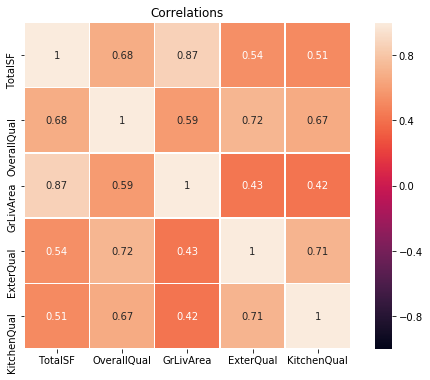

In [72]:
columns = ['TotalSF', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual']
df_train_corr = df_train[columns]
df_train_corr.corr()

corrmat = df_train_corr.corr()

f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, linewidths =.5)
plt.title('Correlations')

plt.show()

Based off the correlations above, it seems as though TotalSF, OverallQual, neighborhoodcat, GarageCars, and TotalBaths should potentially be considered as good predictors for SalePrice. The reason why GrLivArea, KitchenQual' and ExterQual were skipped over are because they are highly correlated with TotalSF and OverallQual respectively, and can lead to multicollinearity in the data.

#### Scaling

In [79]:
x = df_train[['TotalSF', 'OverallQual', 'neighborhoodcat', 'GarageCars', 'TotalBaths']]
y = df_train['SalePrice']

In [80]:
# Standard Scaler:

s_scaler = StandardScaler()
x_std = s_scaler.fit_transform(x)

In [81]:
# MinMax Scaler:

mm_scaler = MinMaxScaler()
x_minmax = mm_scaler.fit_transform(x)